# Undersampling

In [9]:
import pandas as pd

# Load your CSV dataset
dataset = WLASL100

# Find the minimum number of samples for a class
min_samples = dataset['labels'].value_counts().min()

# Create a balanced dataset by undersampling
balanced_dataset = dataset.groupby('labels').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)

# Save the balanced dataset to a new CSV file
# balanced_dataset.to_csv('balanced_dataset.csv', index=False)

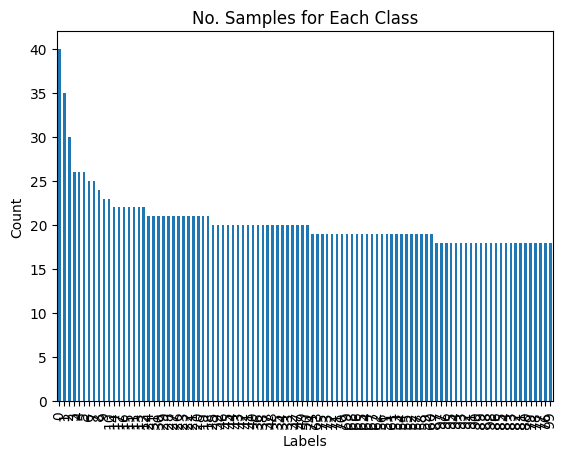

NameError: name 'BODY_IDENTIFIERS' is not defined

In [14]:
calculate_and_print_stats(WLASL100)

In [10]:
def calculate_and_print_stats(balanced_dataset):
    df = balanced_dataset

    # Count the number of rows for each unique label
    label_counts = df['labels'].value_counts()

    label_counts.plot(kind='bar')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('No. Samples for Each Class')
    plt.show()
    
    # Select columns related to body parts
    body_part_columns = [f"{part}_{coord}" for part in BODY_IDENTIFIERS for coord in ["X", "Y"]]
    body_part_data = df[body_part_columns]

    # # Select columns related to hand parts
    hand_part_columns = [f"{part}_{side}_{coord}" for part in HAND_IDENTIFIERS for side in ["right", "left"] for coord in ["X", "Y"]]
    hand_part_data = df[hand_part_columns]

    body_elements_count = body_part_data.applymap(count_elements).sum().sum()
    hand_elements_count = hand_part_data.applymap(count_elements).sum().sum()

    body_zeros = body_part_data.applymap(lambda cell: count_elements(cell, True)).sum().sum()
    hand_zeros = hand_part_data.applymap(lambda cell: count_elements(cell, True)).sum().sum()

    print(f"Num values for body parts: {body_elements_count}")
    print(f"Num Nan values for body parts: {body_zeros}")

    print(f"Num values for hand parts: {hand_elements_count}")
    print(f"Num Nan values for hand parts: {hand_zeros}")

    print(f"Percentage of zero values for body parts: {body_zeros/body_elements_count:.2f}%")
    print(f"Percentage of zero values for hand parts: {hand_zeros/hand_elements_count:.2f}%")

NameError: name 'plt' is not defined

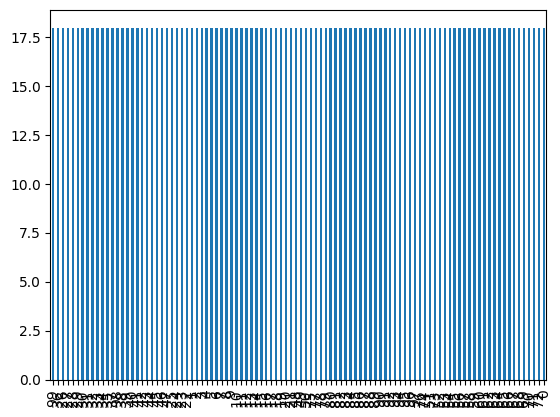

In [11]:
calculate_and_print_stats(balanced_dataset)